# SMI Post Analysis
--> Version 1, Dev March 2, 2018
    Load Qmap and do circular average

In [1]:
%matplotlib notebook
from pySMI.smi_libs import *
from pySMI.smi_package import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })

from databroker import Broker
db = Broker.named('smi')

In [2]:
from skimage.draw import line_aa, line, polygon, ellipse, circle

In [3]:
%run ~/pySMI/pySMI/smi_circular_average.py

## Define input data path

In [207]:
sam0 = 'CT_ESE6_capillary_X-40.40_Y01.30_Qmap_pos=1.tif'
#sam0 = 'CT_ESE6_capillary_X-40.40_Y00.50_Qmap_pos=1.tif'
#hanyu_2_hard_0.2deg_waxs_Qmap_pos=1.tif
sam0 = 'CT_ESE6_X-1.00_Y02.20_Qmap_pos=1.tif'


In [208]:
inDir = '/GPFS/xf12id1/analysis/2018_1/302845/Results/Francisco/%s/'%sam
inDir = '/GPFS/xf12id1/analysis/Debug/CK/'

inDir = '/home/yuzhang/SMI_Debug/CK/'



In [209]:
inDir

'/home/yuzhang/SMI_Debug/CK/'

In [210]:
ls /home/yuzhang/SMI_Debug/CK/

CT_ESE6_capillary_X-40.40_Y00.50_Angle_pos=1.png
CT_ESE6_capillary_X-40.40_Y00.50_Qmap_pos=1.tif
CT_ESE6_capillary_X-40.40_Y00.50_Qmap_qr_cor_pos=1.txt
CT_ESE6_capillary_X-40.40_Y00.50_Qmap_qz_cor_pos=1.txt
CT_ESE6_capillary_X-40.40_Y00.50_Q_pos=1.png
CT_ESE6_capillary_X-40.40_Y01.30_Qmap_pos=1.tif
CT_ESE6_capillary_X-40.40_Y01.30_Qmap_qr_cor_pos=1.txt
CT_ESE6_capillary_X-40.40_Y01.30_Qmap_qz_cor_pos=1.txt
CT_ESE6_X-1.00_Y02.20_Angle_pos=1.png
CT_ESE6_X-1.00_Y02.20_Qmap_pos=1.tif
CT_ESE6_X-1.00_Y02.20_Qmap_qr_cor_pos=1.txt
CT_ESE6_X-1.00_Y02.20_Qmap_qz_cor_pos=1.txt
CT_ESE6_X-1.00_Y02.20_Q_pos=1.png
Post_Analysis_CirAvg_WAXS.ipynb
Results/


In [211]:
inDir0 = '/GPFS/xf12id1/analysis/Debug/CK/'
ResDir = os.path.join( inDir0, 'Results' +'/%s/'%sam0 )
os.makedirs(ResDir, exist_ok=True)
print('Results from this analysis will be stashed in the directory %s' % ResDir)

Results from this analysis will be stashed in the directory /GPFS/xf12id1/analysis/Debug/CK/Results/CT_ESE6_X-1.00_Y02.20_Qmap_pos=1.tif/


# Define parameter for Circular Average

In [212]:
%run ~/pySMI/pySMI/smi_circular_average.py

In [213]:
%run ~/pySMI/pySMI/smi_generic_functions.py

In [214]:
sam = sam0[:-14]
 



In [215]:
print(sam)

CT_ESE6_X-1.00_Y02.20_


In [216]:
energy = 16.1  

setup_pargs =  {'Ldet': 1, #in mm 
 'center': [79,0],
 'dpix': 0.172,  
 'lambda_': 12.39842/energy,
 'path': ResDir,
 'uid': sam,
}



## Load and check data

In [217]:
pos_=1

In [218]:
qmap_fp = '%sQmap_pos=%s.tif'%(sam,pos_)
qx_fp =  '%sQmap_qr_cor_pos=%s.txt'%(sam,pos_)
qz_fp =  '%sQmap_qz_cor_pos=%s.txt'%(sam,pos_)    
xs = np.loadtxt(  inDir + qx_fp   )
zs = np.loadtxt(  inDir + qz_fp   )
#qs = np.sqrt(xs**2 + zs**2 )
qmap = np.array(  PIL.Image.open(  inDir + qmap_fp   ).convert('I') )

In [262]:
vmin=  20
vmax= 1e3

<IPython.core.display.Javascript object>


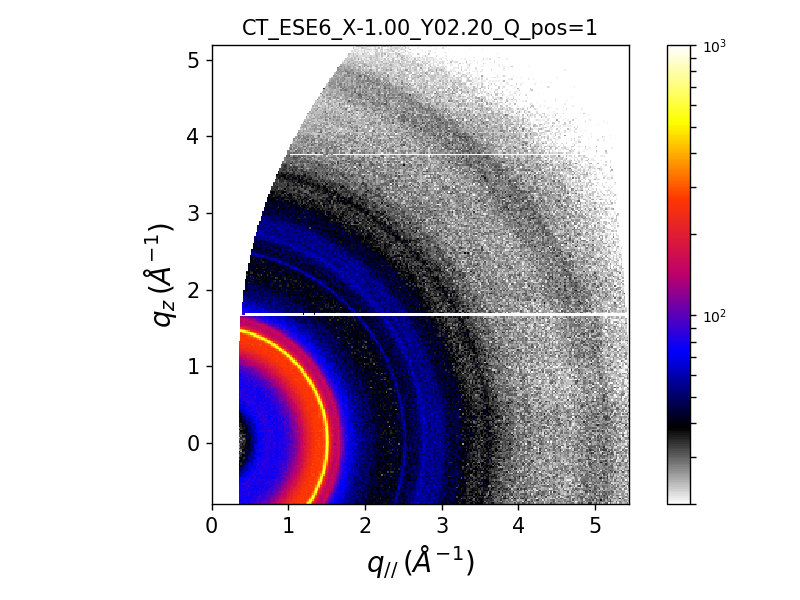

In [266]:
#vmin = 5.0
#vmax=  5e2

show_img(qmap, logs = True,  vmin=  vmin, vmax= vmax,
             extent=[xs[0], xs[-1], zs[0],zs[-1]], 
         xlabel='$q_{//} \, (\AA^{-1})$',  ylabel='$q_z \, (\AA^{-1})$',  cmap = cmap_vge_hdr,
         aspect=1,  image_name = sam + 'Q_pos=1', 
         dpi=500, save= False, path=ResDir)




<IPython.core.display.Javascript object>


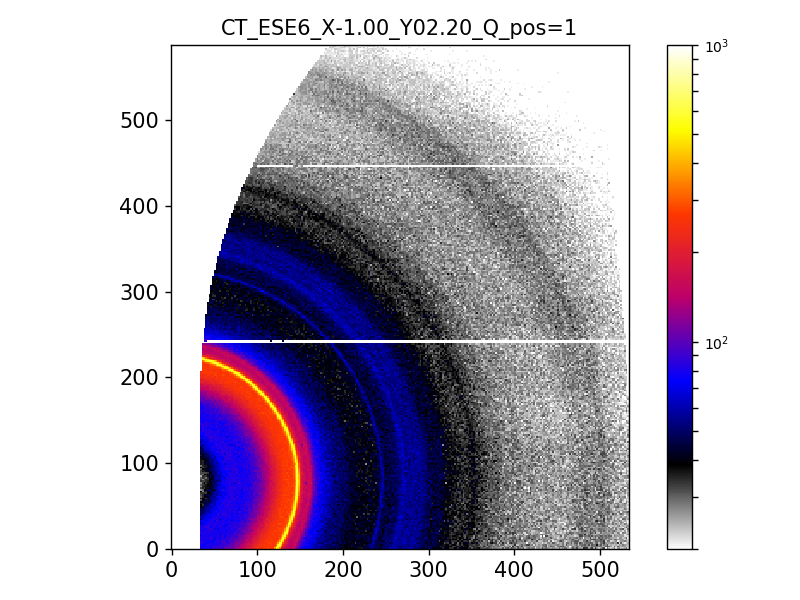

In [263]:
show_img(qmap, logs = True,  vmin=  vmin, vmax= vmax,
             #extent=[xs[0], xs[-1], zs[0],zs[-1]], 
          cmap = cmap_vge_hdr,
         aspect=1,  image_name = sam + 'Q_pos=1', 
         dpi=500, save= False, path=ResDir)

In [229]:
%run ~/pySMI/pySMI/smi_generic_functions.py

In [264]:
rr = 145
r1 = create_ring_mask(  qmap.shape, rr+2,  center=[0, 79]  )
r2 = create_ring_mask(  qmap.shape, rr-2,  center=[0, 79]  ) 
r1[r2] = 0

rr=244
r3 = create_ring_mask(  qmap.shape, rr+2,  center=[0, 79]  )
r4 = create_ring_mask(  qmap.shape, rr-2,  center=[0, 79]  ) 
r3[r4] = 0



rr=349
r5 = create_ring_mask(  qmap.shape, rr+2,  center=[0, 79]  )
r6 = create_ring_mask(  qmap.shape, rr-2,  center=[0, 79]  ) 
r5[r6] = 0


rr=503
r7 = create_ring_mask(  qmap.shape, rr+2,  center=[0, 79]  )
r8 = create_ring_mask(  qmap.shape, rr-2,  center=[0, 79]  ) 
r7[r8] = 0


rsum = r1 + r3 + r5 + r7
#r3=0

<IPython.core.display.Javascript object>


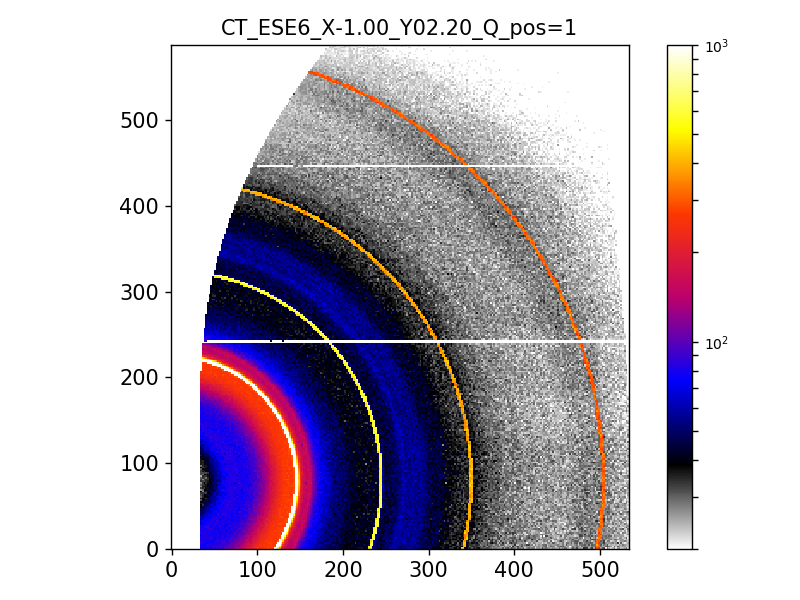

In [265]:
show_img(qmap* ((rsum)*10.0 +1), alpha=.3, aspect=1, image_name = sam + 'Q_pos=1', 
         logs = True,  vmin=  vmin, vmax= vmax, cmap = cmap_vge_hdr,)

# Define a mask

In [234]:
pos_=1
qmap_fp = '%sQmap_pos=%s.tif'%(sam,pos_)
qmap = np.array(  PIL.Image.open(  inDir + qmap_fp   ).convert('I') )

In [235]:
qmap.shape


(588, 534)

In [236]:
vmin= 50
vmax= 4e3
center = [79, 0 ]

In [237]:
mask = np.ones_like(qmap, dtype=bool)
mask[:,:5] = 0 #left edge
mask[:,-5:] = 0 #right edge
mask[:5,:] = 0 #upper edge
mask[-5:,:] = 0 #lower edge

mask.ravel()[np.where(qmap.ravel()==0)] = 0
#mask[:86,:] = 0

#mask[:,:20] = 0 

#mask[ 240:250] = 0 
#mask[ 440:450] = 0 
#ring_mask = create_ring_mask(  mask.shape, qmap.shape[1]-5,  center=[0, 79]  )
ring_mask= mask
mask *= ring_mask
print(mask.shape)

(588, 534)


In [238]:
qmap.max()

634

<IPython.core.display.Javascript object>


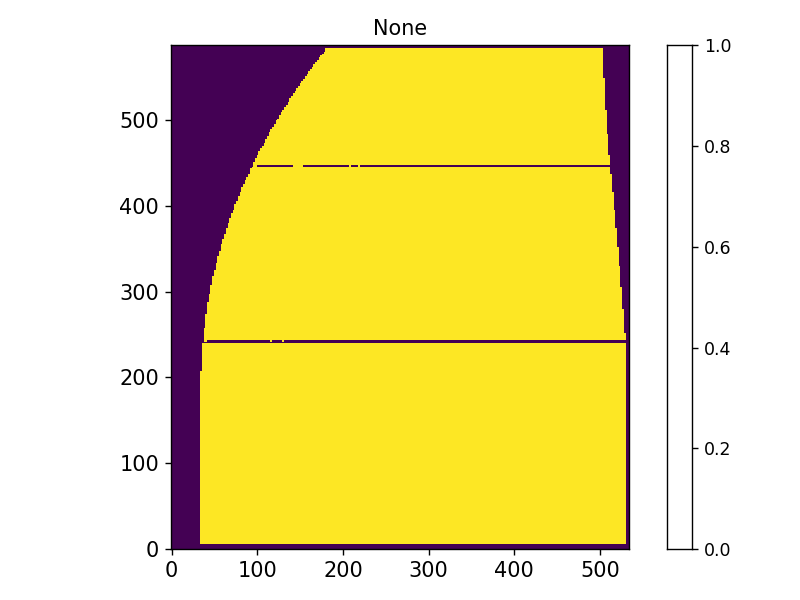

In [239]:
show_img(mask , aspect=1,)

<IPython.core.display.Javascript object>


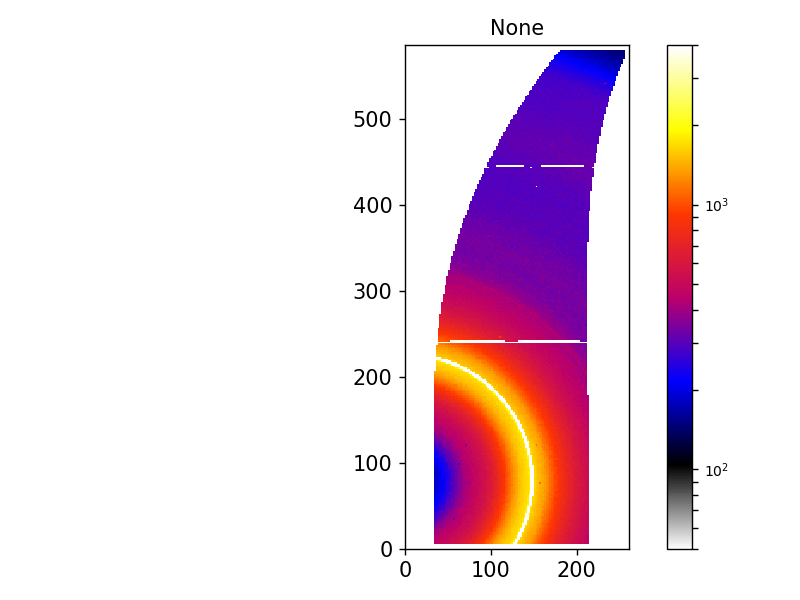

In [99]:
show_img(qmap* (r1*10 +1) *mask, alpha=.3, aspect=1,
         logs = True,  vmin=  vmin, vmax= vmax, cmap = cmap_vge_hdr,)

In [240]:
energy = 16.1  

setup_pargs =  {'Ldet': 1, #in mm 
 'center':  [79,0],
 'dpix': 0.172,  
 'lambda_': 12.39842/energy,
 'path': ResDir,
 'uid': sam,
}


## Do circular average here

In [241]:
pos= [ 1  ] 

In [242]:
uid = sam

<IPython.core.display.Javascript object>


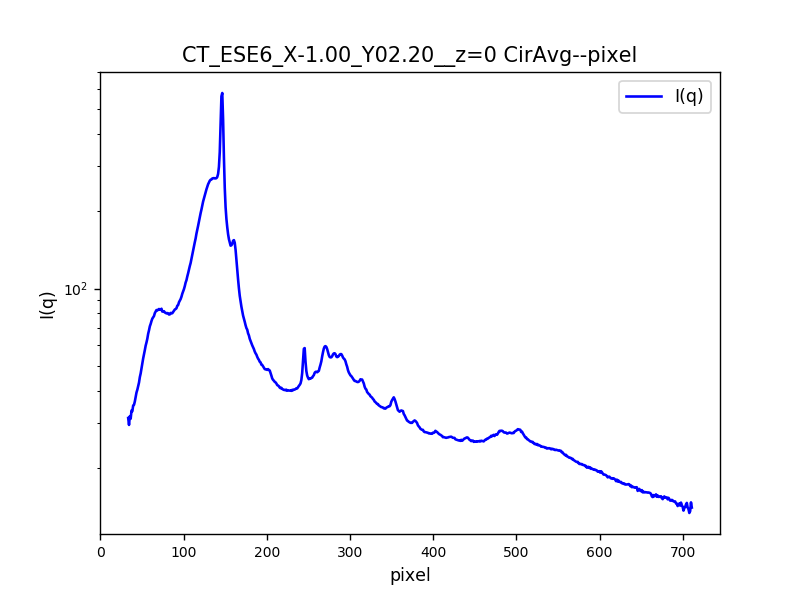

In [267]:
fig, ax  = plt.subplots()
for i, pos_ in enumerate(pos):
    qmap_fp = '%sQmap_pos=%s.tif'%(sam,pos_)
    qx_fp =  '%sQmap_qr_cor_pos=%s.txt'%(sam,pos_)
    qz_fp =  '%sQmap_qz_cor_pos=%s.txt'%(sam,pos_)    
    xs = np.loadtxt(  inDir + qx_fp   )
    zs = np.loadtxt(  inDir + qz_fp   )
    #qs = np.sqrt(xs**2 + zs**2 )
    qmap = np.array(  PIL.Image.open(  inDir + qmap_fp   ).convert('I') )
    qp_saxs, iq_saxs, q_saxs = get_circular_average( qmap*mask , mask, pargs=setup_pargs  )
    #qp_saxs_, iq_saxs_, q_saxs_ = get_circular_average( qs*mask , mask, pargs=setup_pargs  )    
    y = iq_saxs  + (i*50)
    plot1D( x=qp_saxs, y=y, ax=ax,  logy= True, m= '', c= colors[i], legend='I(q)'  )    
    #plot1D( x= range(len(xs)) ,y= qmap[ 79   ], c= 'r', m='',ax=ax )
    
    xvs, zvs = np.meshgrid(xs, zs)  
    valmap = np.hypot(xvs,zvs)
    qp_val, iq_val, q_val = get_circular_average( valmap*mask , mask, pargs=setup_pargs  )
    
    save_lists(  [qp_saxs, iq_saxs, iq_val], label=['q_pixel', 'Iq', 'q_A-1'], 
               filename='%s_pix_Iq_q.csv'%uid, path= ResDir  ) 
    #plot1D( x= xs ,y= qmap[ 79   ], c= 'b', m='',ax=ax, logy=True )
    #plot1D( x= qp_saxs, y=y, ax=ax,  logy= True, m='',)
    #ax.vlines( report_dx*0.99, ymin = ymin,  ymax=report_dy * 300,  color='b'  )
    
ax.set_xlabel('pixel')  
ax.set_ylabel('I(q)')
ax.set_title('%s_z=0 CirAvg--pixel'%sam)
fig.savefig( ResDir + 'Sq_pixel_%spos=%s.png'%(sam, pos_) )
#ax.set_xlim(   [100, 600 ] )  
#ax.set_ylim(  [-10,25000]  )     

<IPython.core.display.Javascript object>


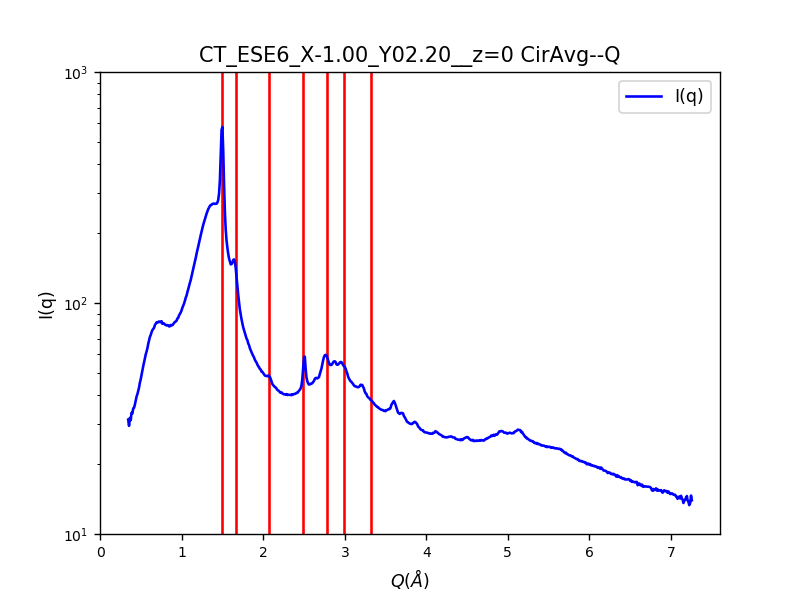

In [268]:
fig, ax  = plt.subplots()
plot1D( x= iq_val, y= iq_saxs, ax=ax,  logy= True, m= '', c= colors[i], legend='I(q)'  )
ax.set_xlabel(r'$Q (\AA)$')  
ax.set_ylabel('I(q)')
ax.set_title('%s_z=0 CirAvg--Q'%sam)
ps = np.array([1.52595, 1.69312, 2.11625, 2.53917, 2.83934, 3.0519, 3.38625])*0.98
ax.vlines(ps, 0,1e4,'r')
ax.set_ylim(10,1e3)

fig.savefig( ResDir + 'Sq_Q_%spos=%s.png'%(sam, pos_) )

In [202]:
if False:
    xvs, zvs = np.meshgrid(xs, zs)  
    valmap = np.hypot(xvs,zvs)
    qp_val, iq_val, q_val = get_circular_average( valmap*mask , mask, pargs=setup_pargs  )
    xvs, zvs = np.meshgrid(xs, zs)  
    valmap = np.hypot(xvs,zvs)
    qp_val, iq_val, q_val = get_circular_average( valmap , None, pargs=setup_pargs  )
    plot1D( x=qp_val, y= iq_val,  logy= True, m= '', c= colors[i], legend='I(q)'  )